
# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

BoomBikes, a US bike-sharing provider, has seen a significant drop in revenue due to the COVID-19 pandemic and is struggling to sustain its operations. To recover post-lockdown, the company aims to understand the demand for shared bikes in the American market. They have engaged a consulting firm to identify key factors influencing bike demand and assess how well these factors predict demand. A large dataset on daily bike usage, incorporating various demographic and meteorological factors, has been collected to aid this analysis.


#### Business Objective
The objective is to develop a predictive model for bike demand using available independent variables. 

This model will help management understand how demand fluctuates with different features, enabling them to adjust business strategies to align with customer expectations. Additionally, the model will provide insights into the demand dynamics in new markets, guiding future expansion and service offerings.


#### Steps involved  
      1)  Importing necessary libraries
          Loading Data Set & Data understanding
      2)  EDA
      3)  Pre processing - Dummy creation
      4)  Train Test Split
      5)  Scaling
      6)  Feature selection
      7)  Modeling
      8)  Residual Analysis
      9)  Making Predictions
      10) Model Evaluation

## Step 1:  Importing necessary libraries

### <span style="color: red;">Data load and understanding</span>

In [1]:
# 1) Importing Libraries

import numpy as np
import pandas as pd

# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importing day.csv
bikesharing = pd.read_csv('day.csv')

In [3]:
bikesharing.head()  

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikesharing.shape

(730, 16)

In [6]:
bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Identify the columns which contain a single unique value across all records
len(bikesharing.loc[:, bikesharing.nunique() == 1].columns)

0

No Columns contains single unique values

In [8]:
# dropping the duplicates
bikesharing.drop_duplicates(inplace=True)

In [9]:
bikesharing.shape

(730, 16)

No Duplicate records found in given data set

In [10]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


instant has only index for the row, dteday has date which can be compensated by year and month column, so these columns can be ignored

In [11]:
# dropping the unwanted columns

bikesharing.drop(['instant', 'dteday'],axis=1,inplace=True)


In [12]:
bikesharing.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Update category columns type as catefory

In [13]:
# updating category columns dtype as category
bikesharing['season']=bikesharing['season'].astype('category')
bikesharing['weathersit']=bikesharing['weathersit'].astype('category')
bikesharing['mnth']=bikesharing['mnth'].astype('category')

In [15]:
# Actual categorical values mapping - Encoding/mapping the season column
bikesharing['season'] = bikesharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
# mapping the month column - month names

bikesharing.mnth = bikesharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
# Encoding/mapping the weekday column

bikesharing.weekday = bikesharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [18]:
bikesharing.weekday.unique()

array(['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [19]:
# Encoding/mapping the weathersit column

bikesharing.weathersit = bikesharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [20]:
bikesharing.weathersit.unique()

['Misty', 'Clear', 'Light_snowrain']
Categories (3, object): ['Clear', 'Misty', 'Light_snowrain']

In [21]:
bikesharing.dtypes

season        category
yr               int64
mnth          category
holiday          int64
weekday         object
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## Exploratory Data Analysis

#### Visualising the Data

most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [23]:
# Get a list of numeric columns

numeric_columns = bikesharing.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [24]:
bikesharing[numeric_columns].describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


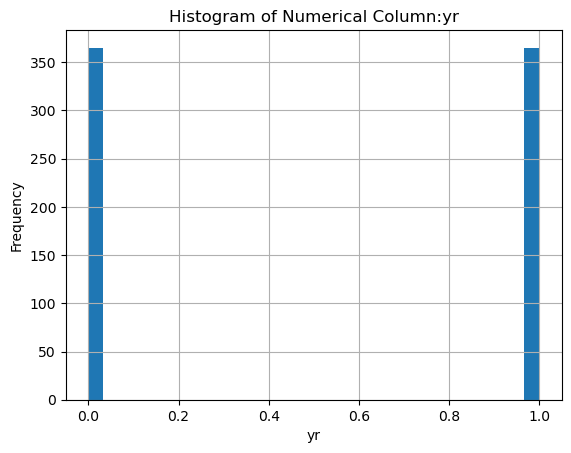

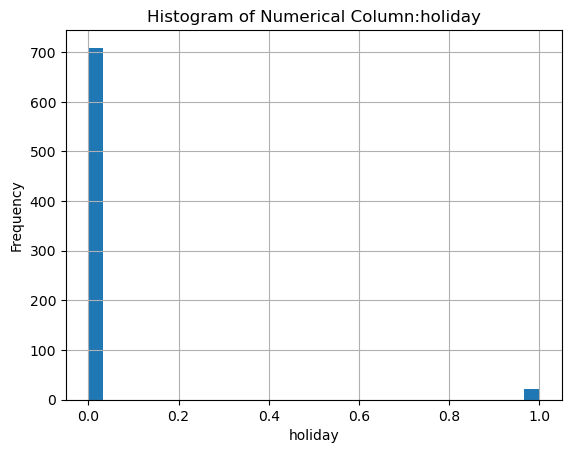

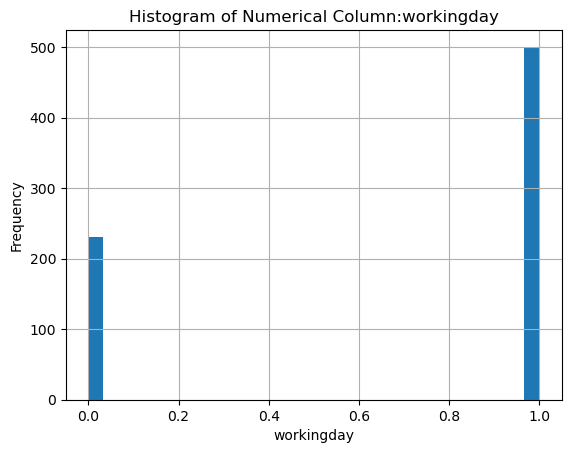

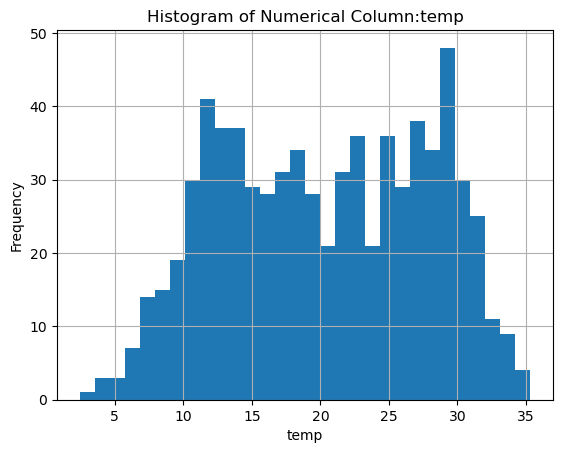

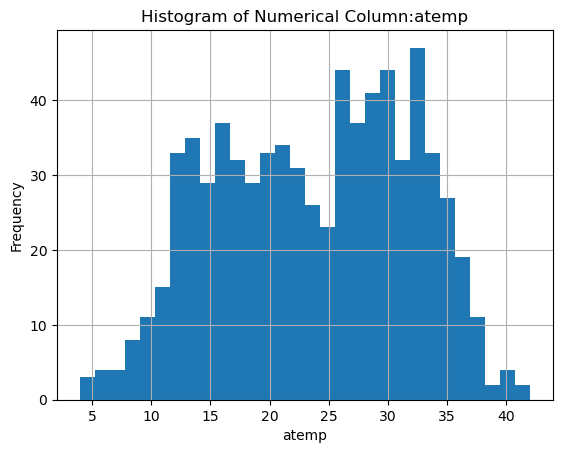

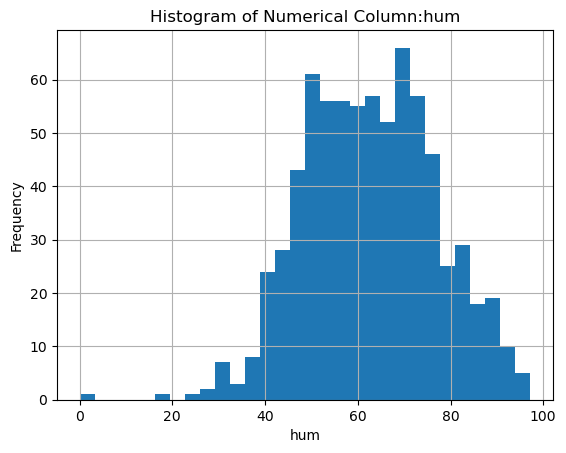

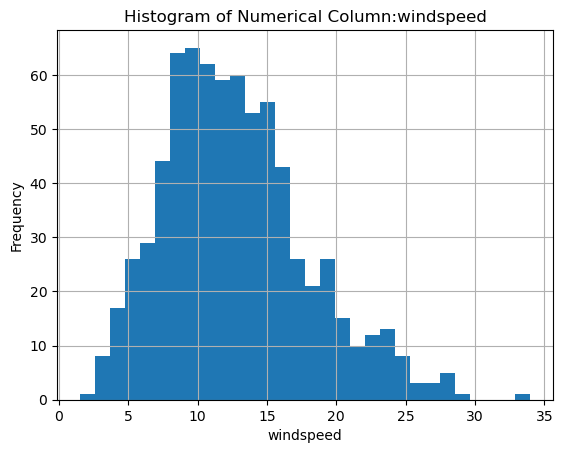

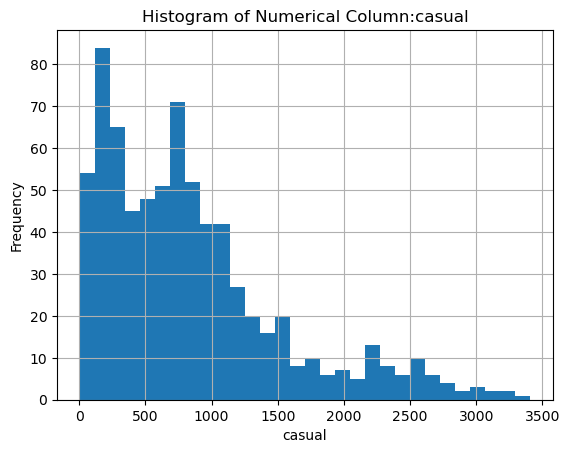

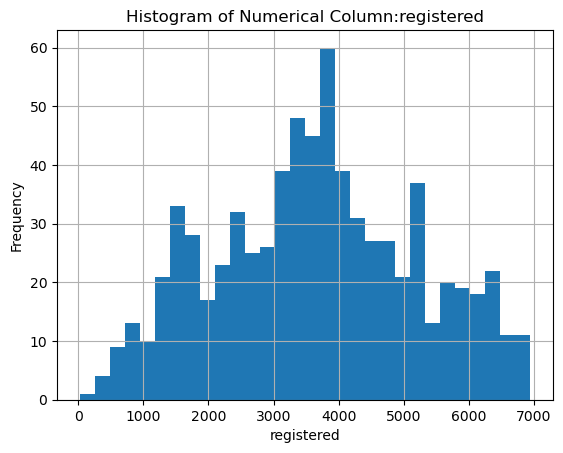

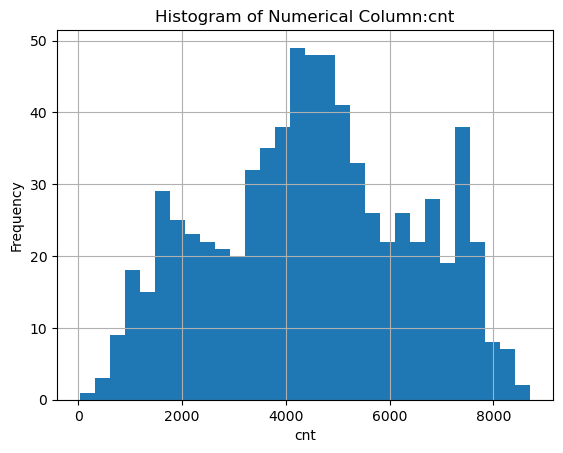

In [25]:
#Numerical variables Univariate Analysis

def plothist(Numcol):
    bikesharing[Numcol].hist(bins=30)
    plt.title('Histogram of Numerical Column:'+Numcol)
    plt.xlabel(Numcol)
    plt.ylabel('Frequency')
    plt.show()
    
for i in numeric_columns:
    plothist(i)

C:\Users\81008015\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


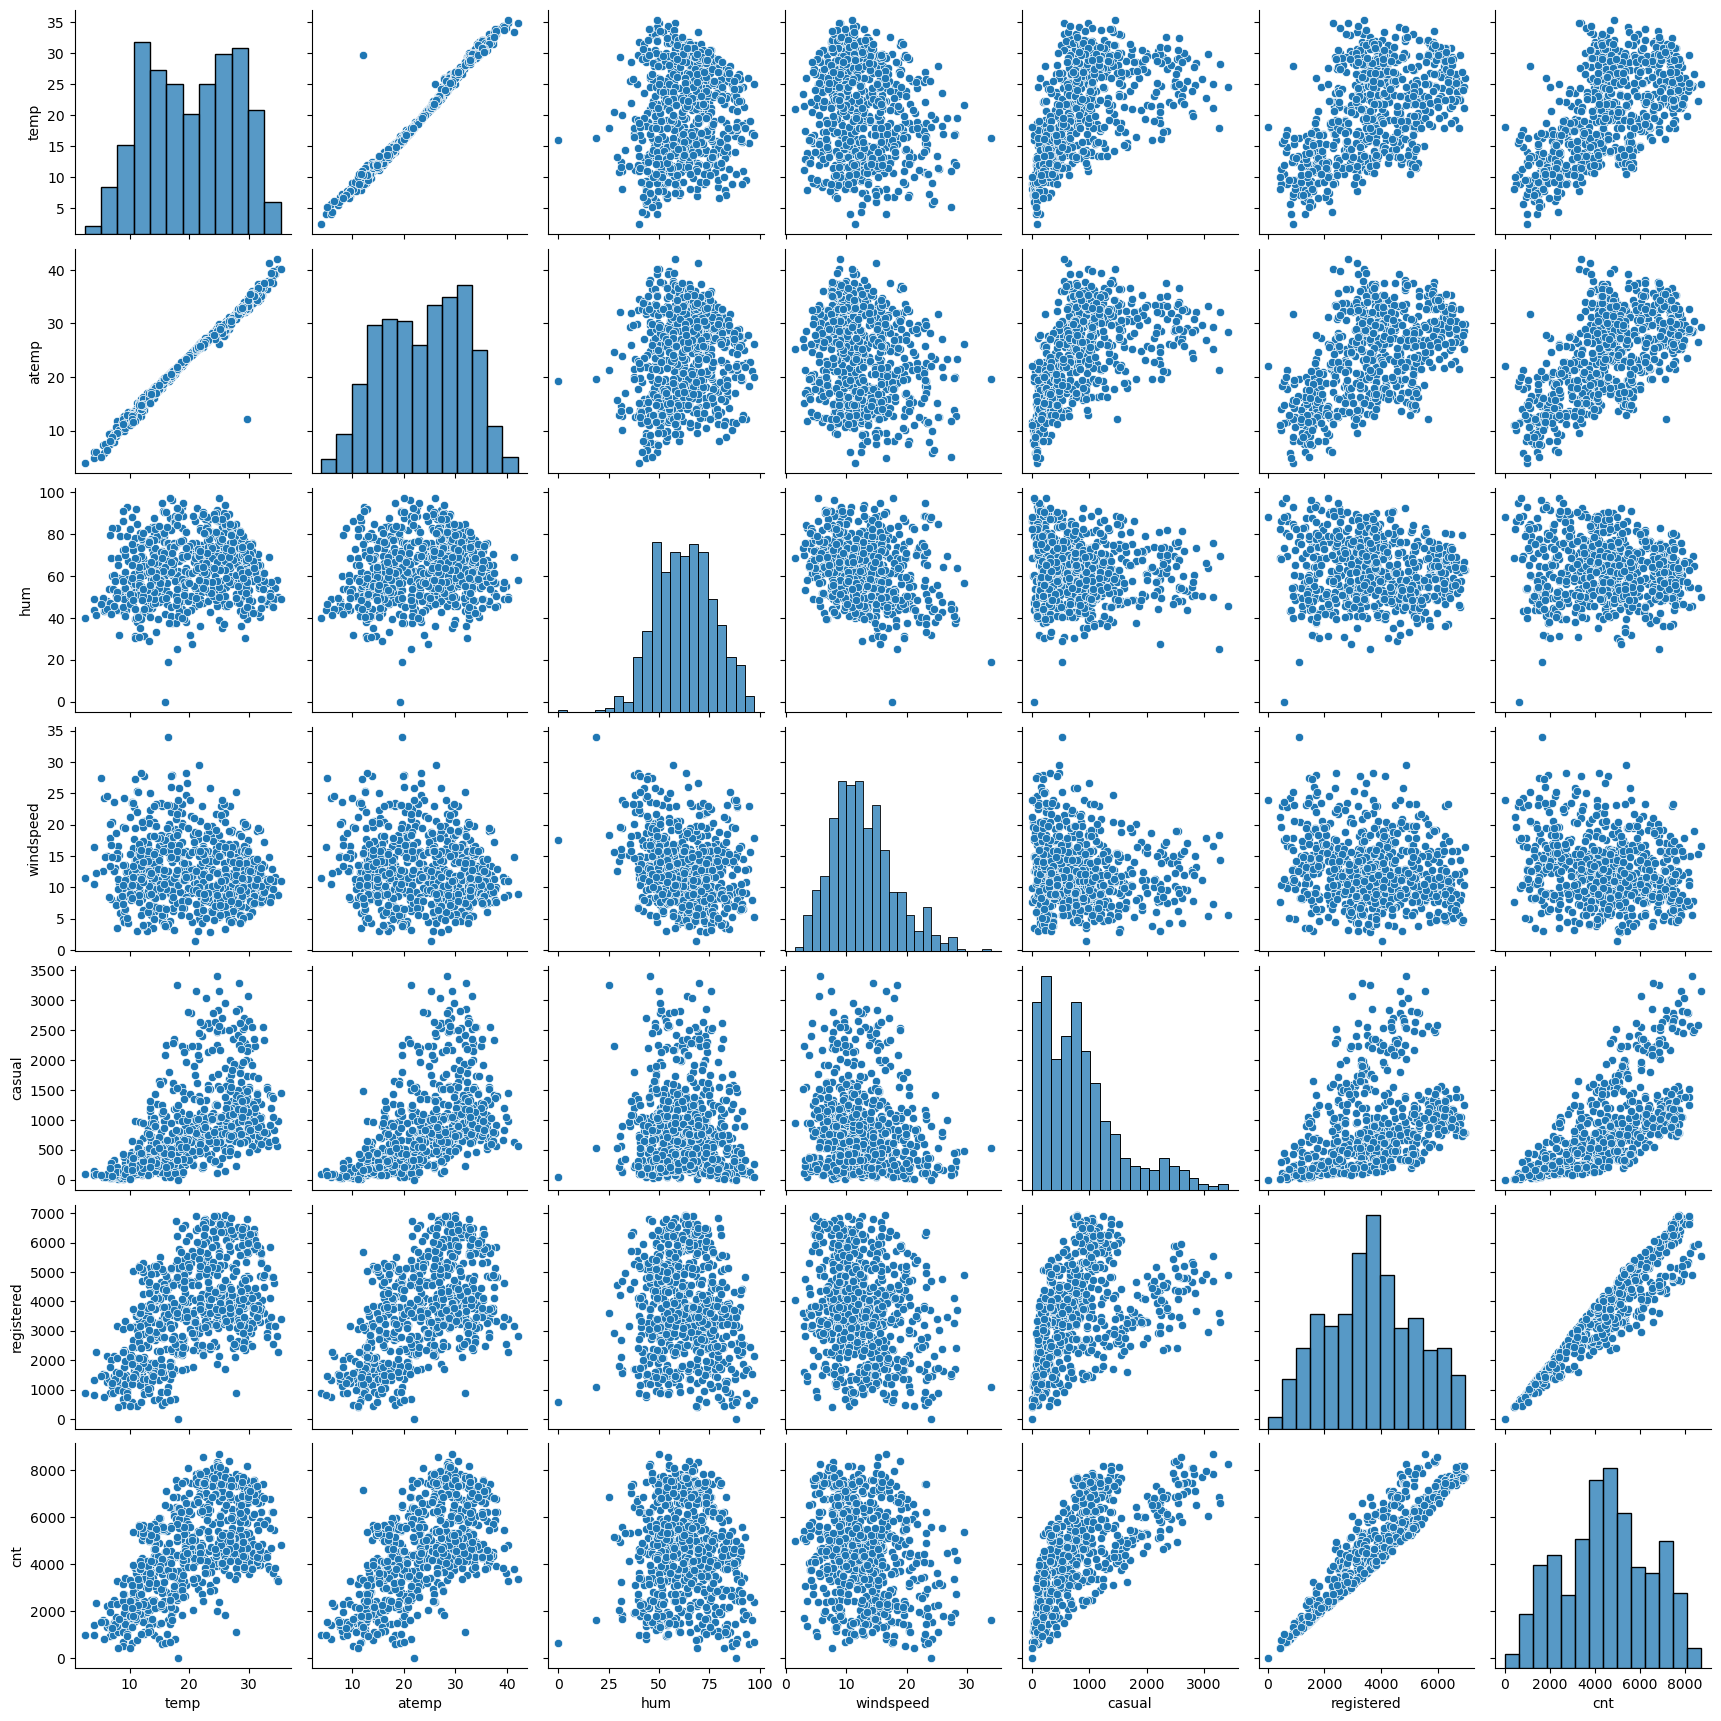

In [29]:
# Do Pair plot only for few specific columns
sns.pairplot(bikesharing[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.show()

Based on Pair plot results:
- temp and atemp increase, cnt (bike rentals) also increases, indicating a positive correlation
- causal and registered are sub fields of target cnt variable

#### Visualising Categorical Variables
 there are a few categorical variables as well. create boxplot for some of these variables.

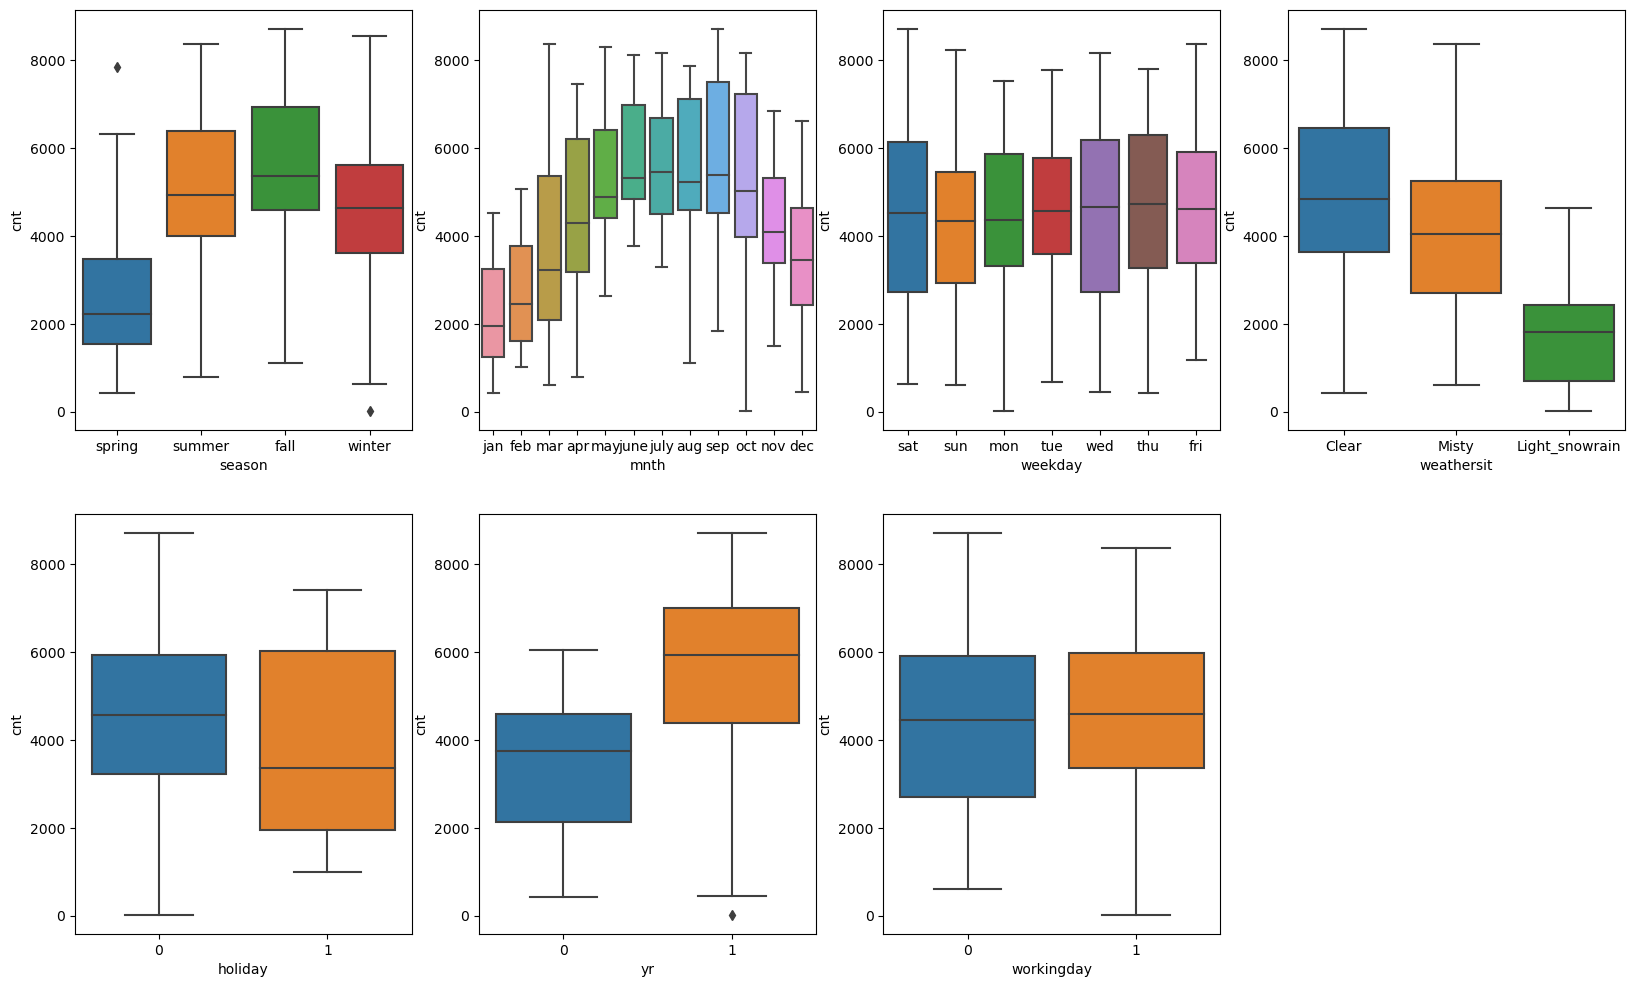

In [30]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)

plt.show()

- Season Variable: Fall season has more bookings and then followed by summer.
- Month Variable: Bookings are more in the month of may, june, july, aug, sep and oct and increasing trend.
- Weathersit variable: Clear weather attracted more rental bookings.
- Weekday variable: Thu, Fir, Sat and Sun have a greater number of bookings as compared to the start of the week.
- Holiday variable: Average number of bookings are comparatively less during holidays
- Working day variable: Booking seemed to be almost equal either on working day or non-working day.
- Year Variable: 2019 attracted a greater number of booking from the previous year

In [31]:
# Bivariate Analysis of Categorical column with numercial column

We can also visualise some of these categorical features parallely by using the `hue` argument.

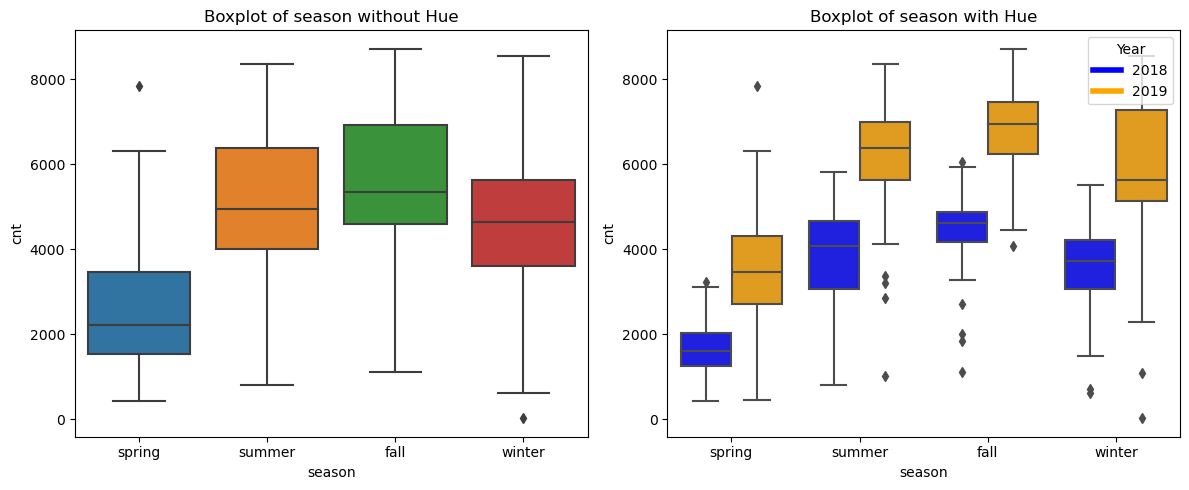

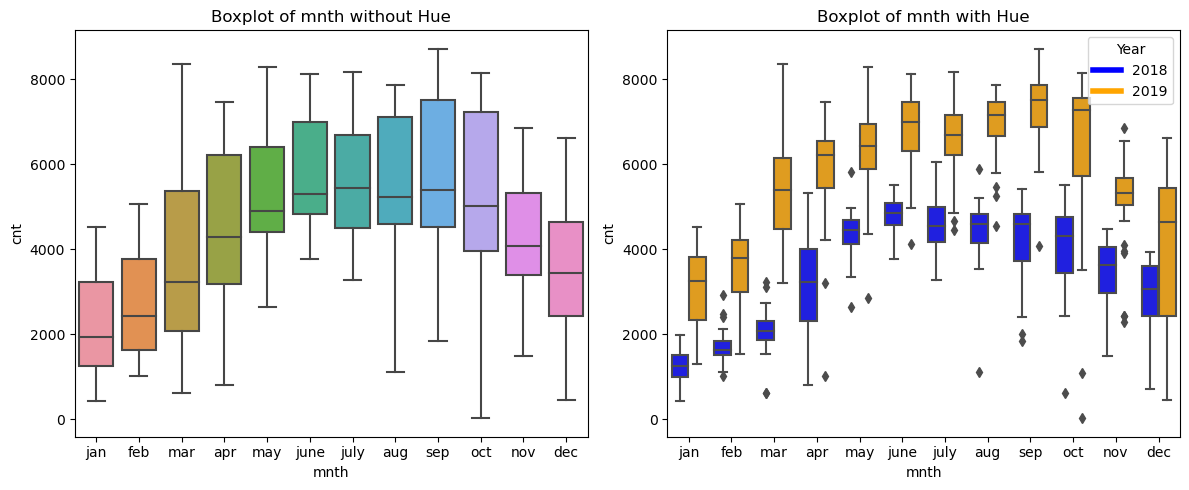

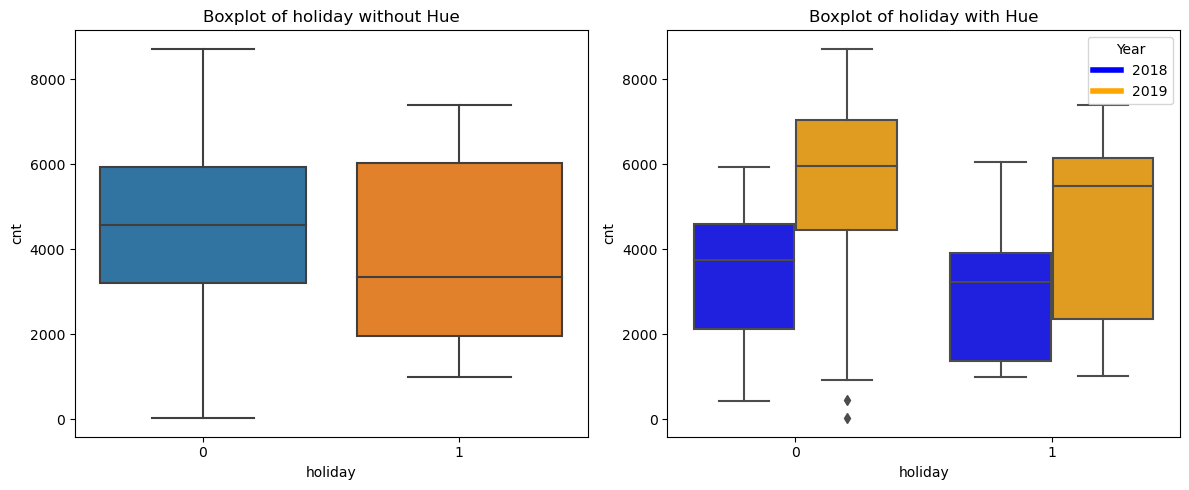

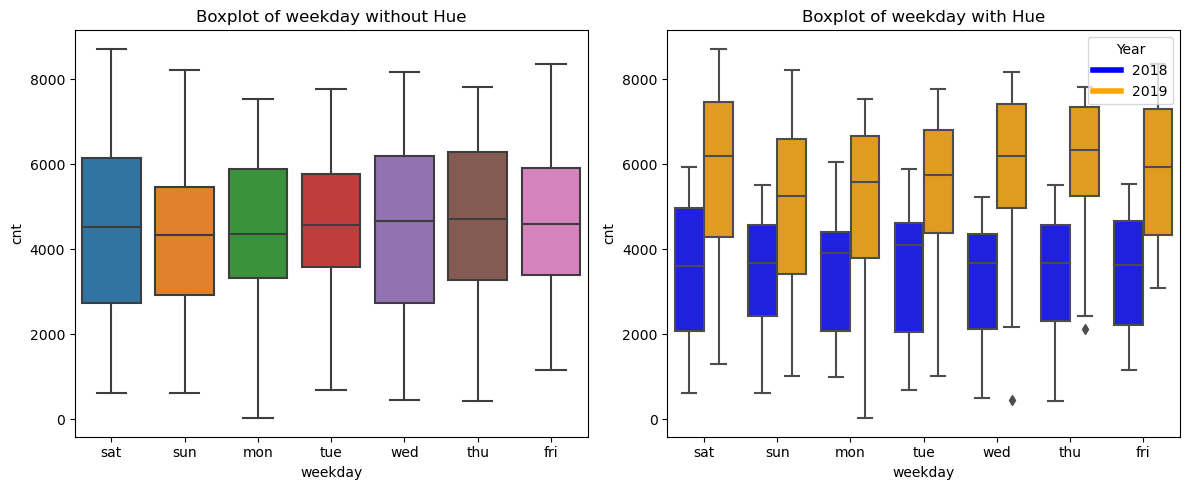

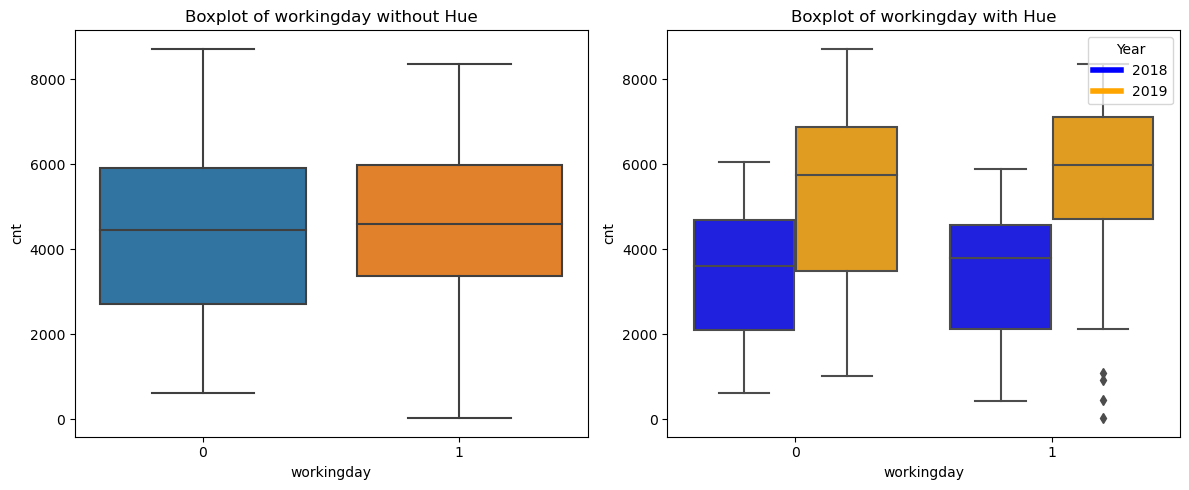

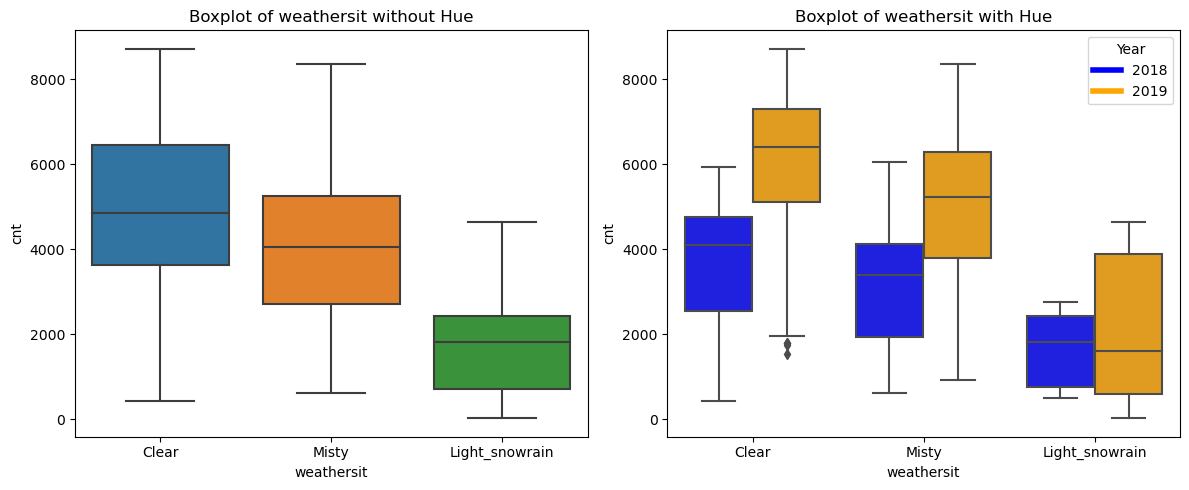

In [32]:
def barplt_cat_Cols(colname):
    plt.figure(figsize=(12, 5))  # Adjusted size for better layout
    
    # First subplot: boxplot without hue
    plt.subplot(1, 2, 1)
    sns.boxplot(x=colname, y='cnt', data=bikesharing)
    plt.title(f'Boxplot of {colname} without Hue')

    # Second subplot: boxplot with hue
    plt.subplot(1, 2, 2)
    hue_palette = {0: 'blue', 1: 'orange'}  # Define your color palette for hues
    sns.boxplot(x=colname, y='cnt', hue='yr', data=bikesharing, palette=hue_palette)
    plt.title(f'Boxplot of {colname} with Hue')
    
    # Create legend manually to ensure colors match
    handles = [plt.Line2D([0], [0], color=hue_palette[i], lw=4) for i in hue_palette]
    plt.legend(handles, ['2018', '2019'], title='Year', loc='upper right')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
    
    
barplt_cat_Cols('season')
barplt_cat_Cols('mnth')
barplt_cat_Cols('holiday')
barplt_cat_Cols('weekday')
barplt_cat_Cols('workingday')
barplt_cat_Cols('weathersit')


In [33]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [34]:
bikesharing.drop(['casual', 'registered'], axis=1, inplace =True)

In [35]:
bikesharing.shape

(730, 12)

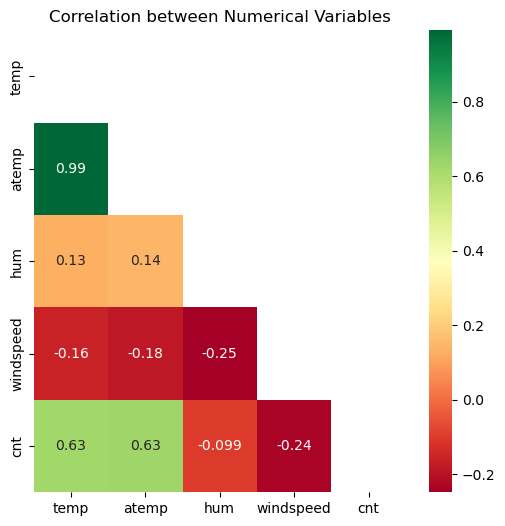

In [36]:
 #Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bikesharing[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bikesharing[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

- temp variable have high correlation with target variable

- temp and atemp for very highly correlated and one of it can be ignored to improve model efficiency

## Step 3 : Pre Processing - Dummy veriables


"n-1 rule" for dummy variables refers to the practice of creating one fewer dummy variable than the number of categories in a categorical feature. This approach helps avoid the dummy variable trap, which occurs when you include all dummy variables for a categorical feature, leading to multicollinearity in regression models.

Explanation of the n-1 Rule
Categories: If a categorical variable has 𝑛 distinct categories, you typically create n−1 dummy variables.

Example: If you have a categorical variable "Color" with three categories: Red, Blue, and Green, you would create two dummy variables:
Is_Blue (1 if Blue, 0 otherwise)
Is_Green (1 if Green, 0 otherwise)
In this case, Red would be the reference category.

Why Use n-1 Rule?
Avoid Multicollinearity: Including all dummy variables leads to perfect multicollinearity, as the sum of the dummy variables can perfectly predict the omitted category.
Interpretability: The coefficients for the included dummy variables represent the difference in the response variable relative to the reference category.


In [37]:
# Generate dummy variables for the specified categorical columns, with drop_first=True
bikesharing = pd.get_dummies(bikesharing, columns=['mnth', 'weekday','season', 'weathersit'], drop_first=True, dtype=int)

In [38]:
bikesharing.shape

(730, 30)

After adding dummy variables, features increased to 30

## Step : Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.



In [39]:
from sklearn.model_selection import train_test_split

# we specify this random seed so that train and test data set always have the same rows respectively

np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size=0.7,test_size=0.3, random_state=100)


In [40]:
# check the shape of training datatset
df_train.shape

(510, 30)

In [41]:
# check the shape of test dataset
df_test.shape

(219, 30)

### Rescaling the Features 

In [42]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_feb,mnth_mar,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_summer,season_fall,season_winter,weathersit_Misty,weathersit_Light_snowrain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.066667,0.098039,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.249689,0.297660,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### variables 'temp','atemp','hum','windspeed', 'cnt' are having values with different scale which need to be scaled properly

#### Scaling techniques:
are essential in preprocessing data for machine learning models, especially when features have different ranges and units. Here are some common scaling techniques, including Min-Max scaling, along with their purposes and use cases:

1. Min-Max Scaling
Description: Min-Max scaling transforms features to a fixed range, typically [0, 1]. It scales each feature by subtracting the minimum value and dividing by the range (max - min).

𝑋′= (𝑋−𝑋𝑚𝑖𝑛)/(𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛)
 
Purpose: It ensures that all features contribute equally to the distance calculations, especially important for algorithms like k-nearest neighbors (KNN) and gradient descent-based methods.

Use Case: Useful when features have different units or scales and you want to ensure that all features are within the same range.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
- Fit and transform the data
scaled_data = min_max_scaler.fit_transform(data)
- Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
print(scaled_df)

2. Standardization (Z-score Normalization)
Description: Standardization transforms features to have a mean of 0 and a standard deviation of 1. It is calculated as follows:

𝑋′= (𝑋−𝜇)/𝜎
 
where
μ is the mean and 
σ is the standard deviation.

Purpose: It helps in situations where the data follows a Gaussian distribution. It centers the data around zero and scales it based on the variance.

Use Case: Commonly used for algorithms that assume normally distributed data (e.g., linear regression, logistic regression, and neural networks).

from sklearn.preprocessing import StandardScaler

- Initialize the scaler
standard_scaler = StandardScaler()

- Fit and transform the data
standardized_data = standard_scaler.fit_transform(data)

- Convert back to DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=data.columns)
print(standardized_df)


3. Robust Scaling
Description: Robust scaling uses the median and the interquartile range (IQR) to scale features:

𝑋′= (𝑋−median(𝑋))/IQR(𝑋)
 
Purpose: This technique is less sensitive to outliers than Min-Max scaling and standardization.
Use Case: Useful when your dataset contains outliers that could skew the mean and standard deviation.

4. MaxAbs Scaling
Description: MaxAbs scaling scales each feature by its maximum absolute value, keeping the data in the range [-1, 1]:

𝑋′=𝑋/∣𝑋𝑚𝑎𝑥∣
 
Purpose: It preserves the sparsity of the data and is useful when dealing with sparse datasets.

Use Case: Often used in text classification and natural language processing tasks where data is sparse.

5. Log Transformation
Description: Log transformation applies the logarithm to each feature, which can help in handling skewed distributions:

𝑋′=log(𝑋+1)

Purpose: It reduces the effect of extreme values and can make skewed data more normally distributed.

Use Case: Useful in situations where the data follows a power law distribution or has large outliers.

6. Power Transformations
Description: Techniques like Box-Cox and Yeo-Johnson transform the data to make it more Gaussian-like. Box-Cox only works with positive values, while Yeo-Johnson can handle zero and negative values.

Purpose: To stabilize variance and make the data more normal distribution-like.

Use Case: When normality is a key assumption for the algorithms being used.

Conclusion
Choosing the right scaling technique depends on the nature of your data and the requirements of the machine learning algorithms you plan to use. Understanding these techniques can help improve model performance and ensure that features are appropriately normalized for analysis.

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
# Applying MinMaxscaler() to all the numerical columns (except the 'yes-no' and 'dummy' variables)

num_vars = ['temp','atemp','hum','windspeed', 'cnt' ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])



In [46]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_feb,mnth_mar,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_summer,season_fall,season_winter,weathersit_Misty,weathersit_Light_snowrain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.066667,0.098039,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.249689,0.297660,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


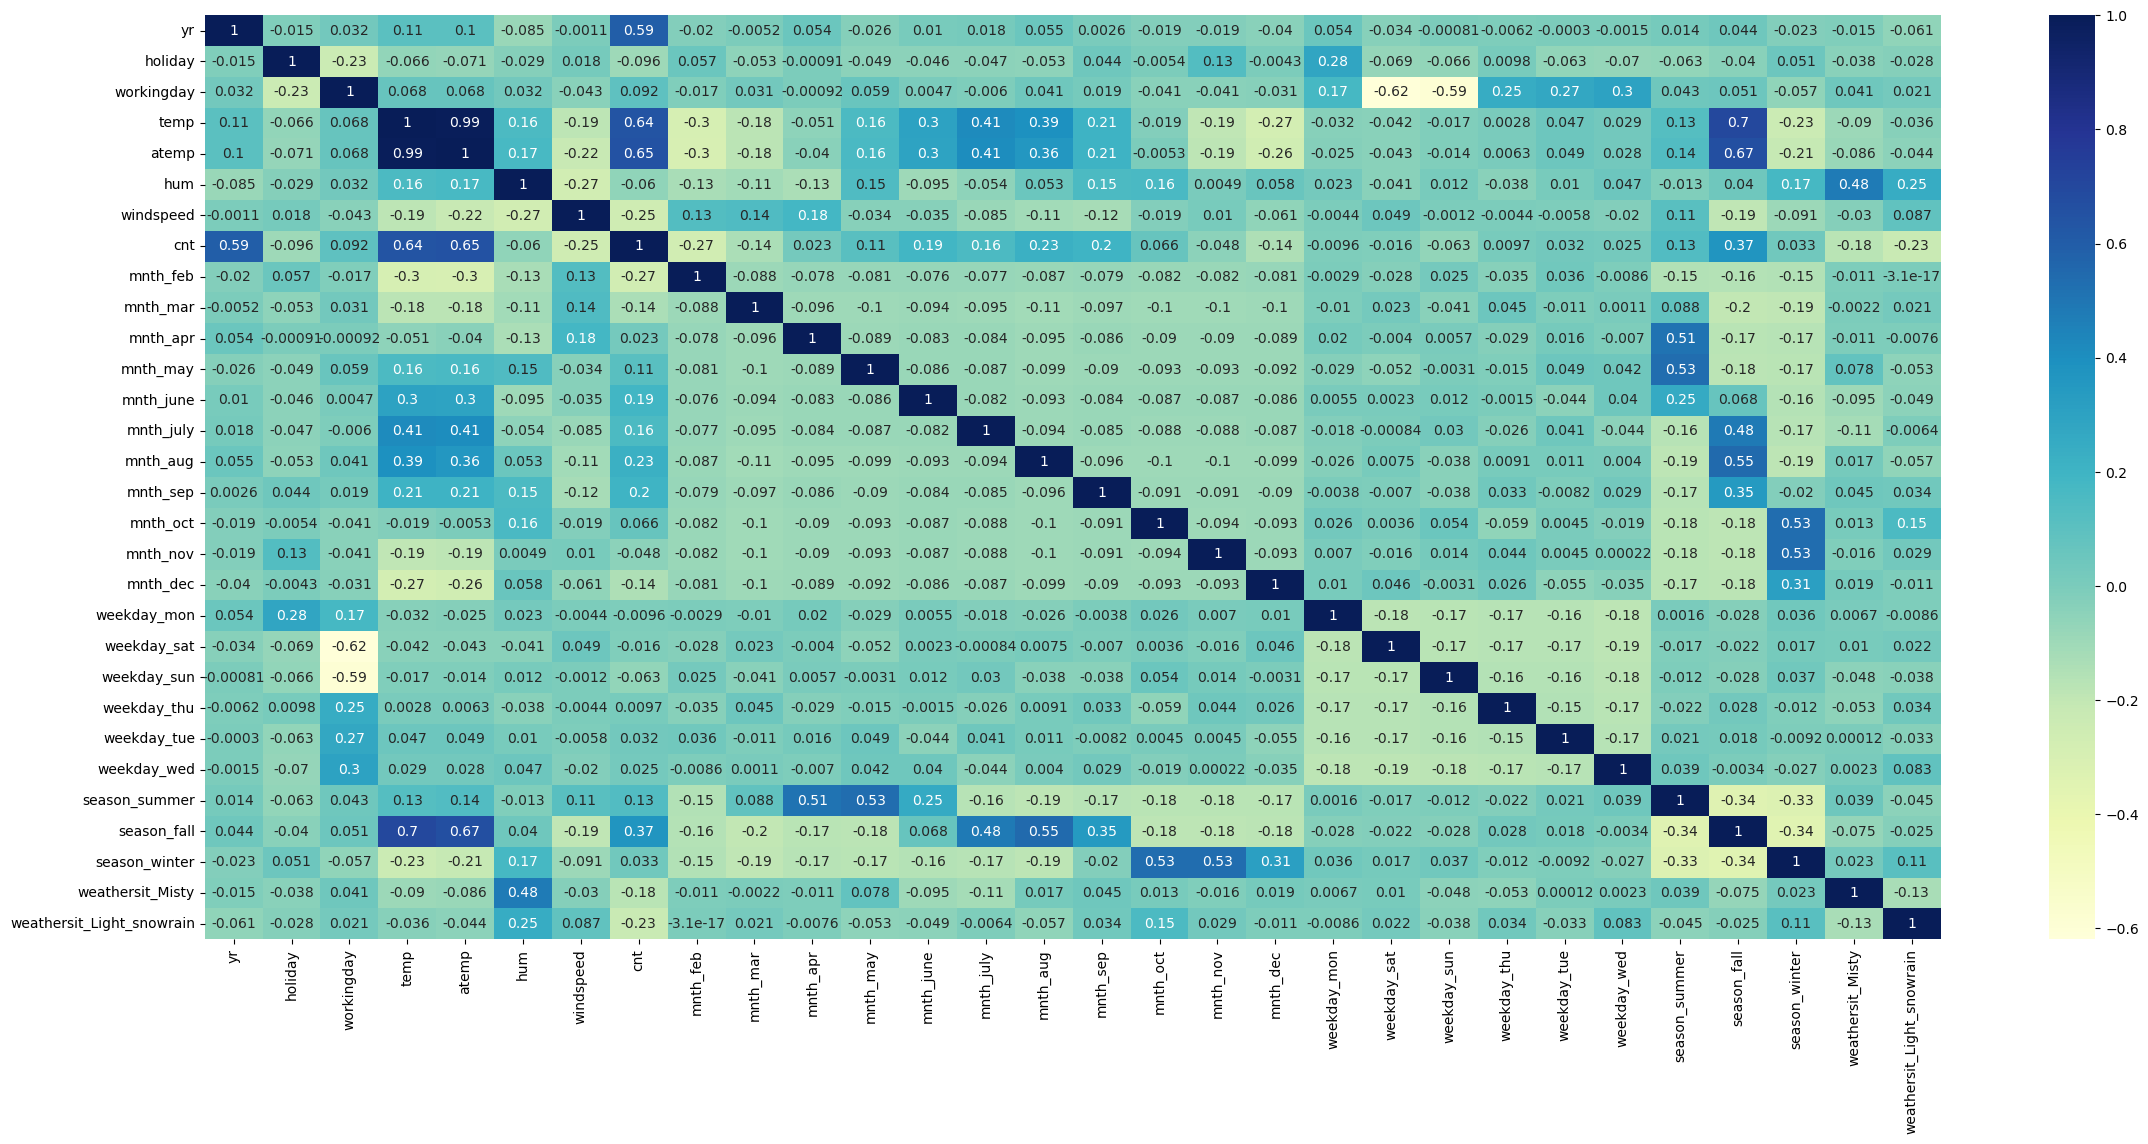

In [47]:
# check the correlation coefficients to see which variables are highly correlated


plt.figure(figsize = (28, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()



#### cnt seems to have correlation with year variable and temp. 
#### Misty and humidity show correlation. 
#### Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.



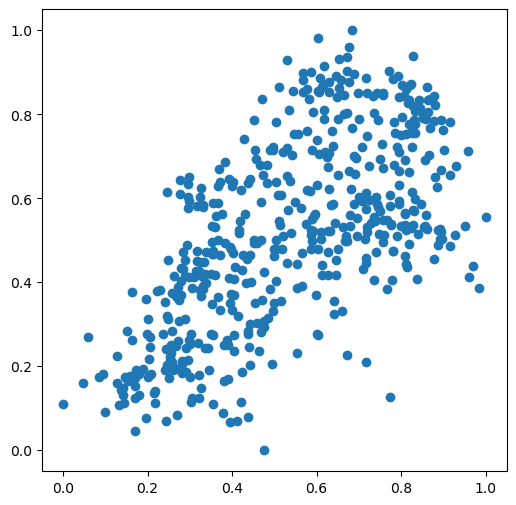

In [48]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms the positive correlation between temp and cnt.

### Dividing into X and Y sets for the model building

In [49]:
# Create the X and y training and testing data sets
# cnt is target variable
y_train = df_train.pop('cnt')
X_train = df_train

y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe0 = sm.add_constant(X_train)
lm0 = sm.OLS(y_train,X_train_rfe0).fit()   # Running the linear model
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          8.42e-181
Time:                        21:07:08   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Building a linear model

we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

RFE - Recursive feature elimination

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# running RFE with output number of features as 15

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(estimator=lm1, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

In [53]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_feb', False, 7),
 ('mnth_mar', False, 2),
 ('mnth_apr', False, 4),
 ('mnth_may', False, 3),
 ('mnth_june', False, 5),
 ('mnth_july', False, 8),
 ('mnth_aug', True, 1),
 ('mnth_sep', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 9),
 ('mnth_dec', False, 10),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 15),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Misty', True, 1),
 ('weathersit_Light_snowrain', True, 1)]

In [54]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'weekday_sat', 'season_summer', 'season_fall',
       'season_winter', 'weathersit_Misty', 'weathersit_Light_snowrain'],
      dtype='object')


In [55]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_june',
       'mnth_july', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [56]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe1 = X_train[col]
X_test_rfe1 = X_test[col]

In [57]:
X_train_rfe1.shape
X_test_rfe1.shape

(219, 15)


### Building model using statsmodel, for the detailed statistics

Model 2

In [58]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_rfe1)
X_test_rfe2 = sm.add_constant(X_test_rfe1)

In [59]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.89e-191
Time:                        21:07:14   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [60]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to Calculate Variance Inflation Factor (VIF)
# This function identifies multicollinearity in predictor variables 
# by calculating the VIF for each feature in a given DataFrame.

def calculateVIF(df):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in the DataFrame.
    
    Parameters:
    df (DataFrame): DataFrame containing the predictor variables.
    
    Returns:
    DataFrame: A DataFrame with features and their corresponding VIF values, sorted in descending order.
    """
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [61]:
calculateVIF(X_train_rfe2)

,Features,VIF
0,const,53.48
12,season_fall,6.04
4,temp,3.71
11,season_summer,2.60
13,season_winter,2.17
5,hum,1.91
3,workingday,1.88
10,weekday_sat,1.79
7,mnth_aug,1.68
14,weathersit_Misty,1.58


In [62]:
X_train_rfe2 = X_train_rfe2.drop(['season_fall'], axis=1)

In [63]:
X_train_rfe2.dtypes

const                        float64
yr                             int64
holiday                        int64
workingday                     int64
temp                         float64
hum                          float64
windspeed                    float64
mnth_aug                       int32
mnth_sep                       int32
mnth_oct                       int32
weekday_sat                    int32
season_summer                  int32
season_winter                  int32
weathersit_Misty               int32
weathersit_Light_snowrain      int32
dtype: object

In [64]:

import statsmodels.api as sm  
lm3 = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.24e-192
Time:                        21:07:19   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [65]:
calculateVIF(X_train_rfe2)

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.88
10,weekday_sat,1.79
12,season_winter,1.72
4,temp,1.59
13,weathersit_Misty,1.57
9,mnth_oct,1.49
7,mnth_aug,1.46
11,season_summer,1.38



plt.figure(figsize = (28, 12))
sns.heatmap(X_train_rfe2.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [66]:
X_train_rfe3 = X_train_rfe2.drop(['holiday'], axis=1)
#X_train_rfe3 = sm.add_constant(X_train_rfe3)

lm4 = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.86e-192
Time:                        21:07:20   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -946.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [67]:
calculateVIF(X_train_rfe3)

,Features,VIF
0,const,52.04
4,hum,1.88
11,season_winter,1.72
2,workingday,1.65
9,weekday_sat,1.65
3,temp,1.59
12,weathersit_Misty,1.57
8,mnth_oct,1.49
6,mnth_aug,1.46
10,season_summer,1.38


In [68]:
X_train_rfe3.describe()

,const,yr,workingday,temp,hum,windspeed,mnth_aug,mnth_sep,mnth_oct,weekday_sat,season_summer,season_winter,weathersit_Misty,weathersit_Light_snowrain
count,510.0,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,1.0,0.507843,0.676471,0.537262,0.650369,0.320768,0.096078,0.080392,0.086275,0.154902,0.245098,0.24902,0.343137,0.029412
std,0.0,0.500429,0.468282,0.225844,0.145882,0.169797,0.294988,0.272166,0.281045,0.362166,0.430568,0.43287,0.475223,0.169124
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.0,1.000000,1.000000,0.540519,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.0,1.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [69]:
calculateVIF(X_train_rfe3)

,Features,VIF
0,const,52.04
4,hum,1.88
11,season_winter,1.72
2,workingday,1.65
9,weekday_sat,1.65
3,temp,1.59
12,weathersit_Misty,1.57
8,mnth_oct,1.49
6,mnth_aug,1.46
10,season_summer,1.38


In [70]:
X_train_rfe3.shape

(510, 14)

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
y_train_cnt = lm4.predict(X_train_rfe3)

In [72]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\81008015\AppData\Local\Temp\ipykernel_13816\2756863869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

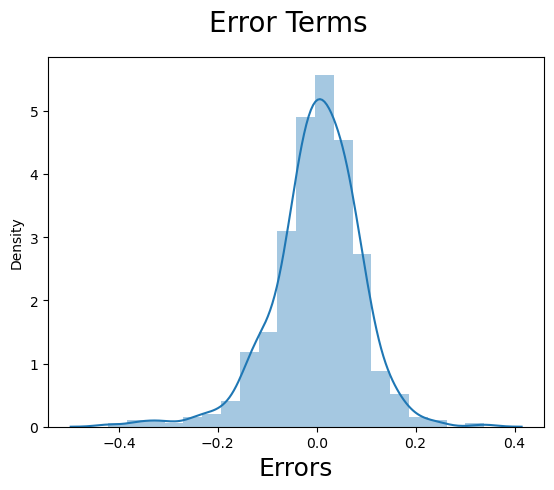

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Multi Colinearity

In [74]:
calculateVIF(X_train_rfe3)

,Features,VIF
0,const,52.04
4,hum,1.88
11,season_winter,1.72
2,workingday,1.65
9,weekday_sat,1.65
3,temp,1.59
12,weathersit_Misty,1.57
8,mnth_oct,1.49
6,mnth_aug,1.46
10,season_summer,1.38


VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Linearity 

In [75]:
X_train_rfe3.dtypes

const                        float64
yr                             int64
workingday                     int64
temp                         float64
hum                          float64
windspeed                    float64
mnth_aug                       int32
mnth_sep                       int32
mnth_oct                       int32
weekday_sat                    int32
season_summer                  int32
season_winter                  int32
weathersit_Misty               int32
weathersit_Light_snowrain      int32
dtype: object

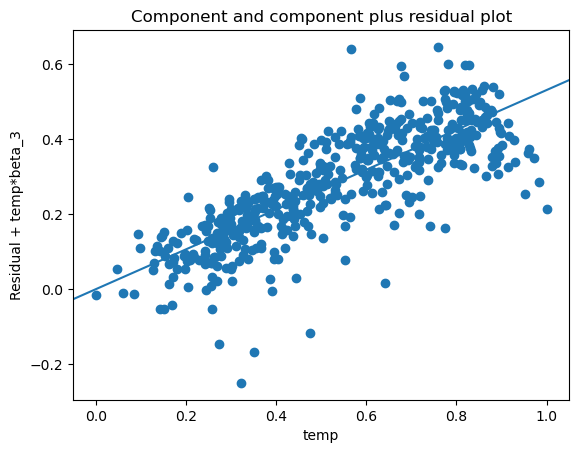

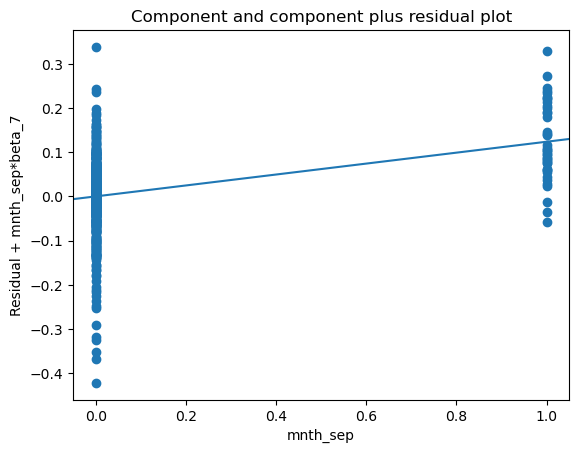

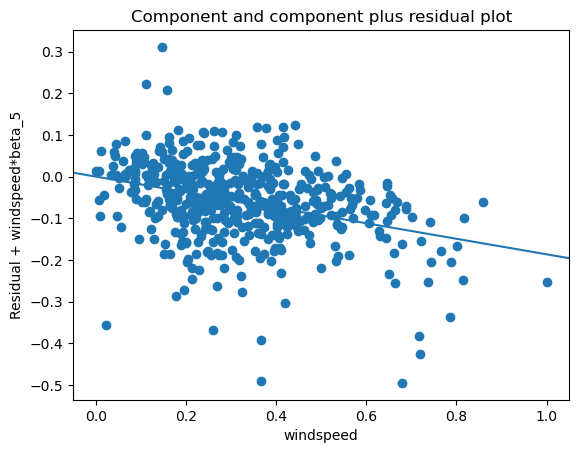

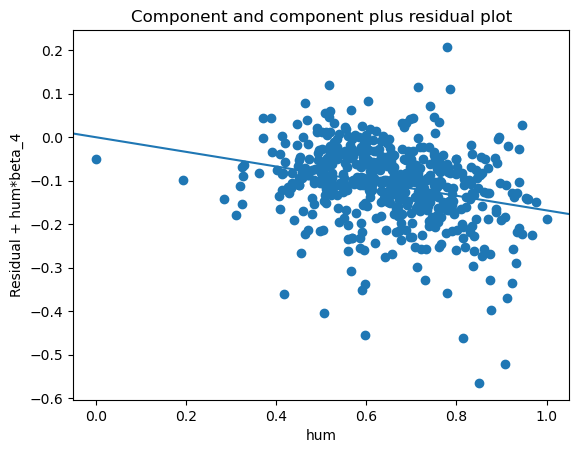

In [76]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm4, 'mnth_sep')
plt.show()

sm.graphics.plot_ccpr(lm4, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lm4, 'hum')
plt.show()


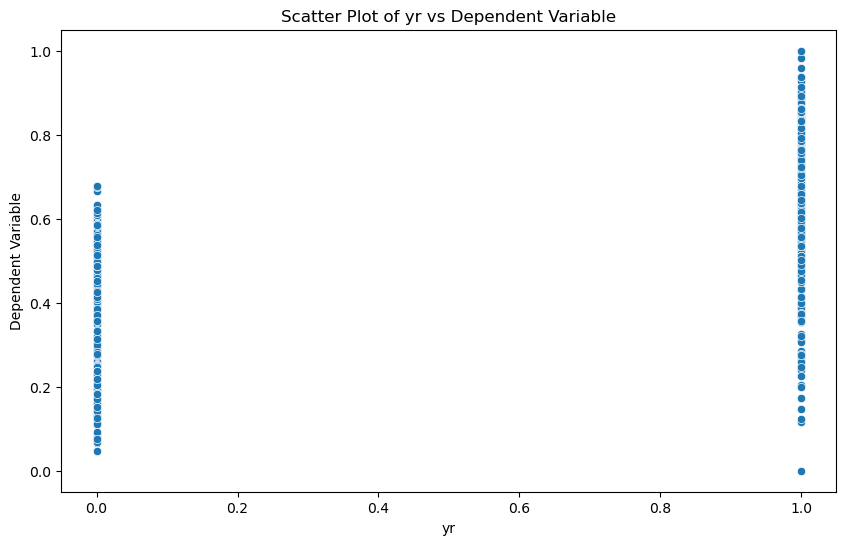

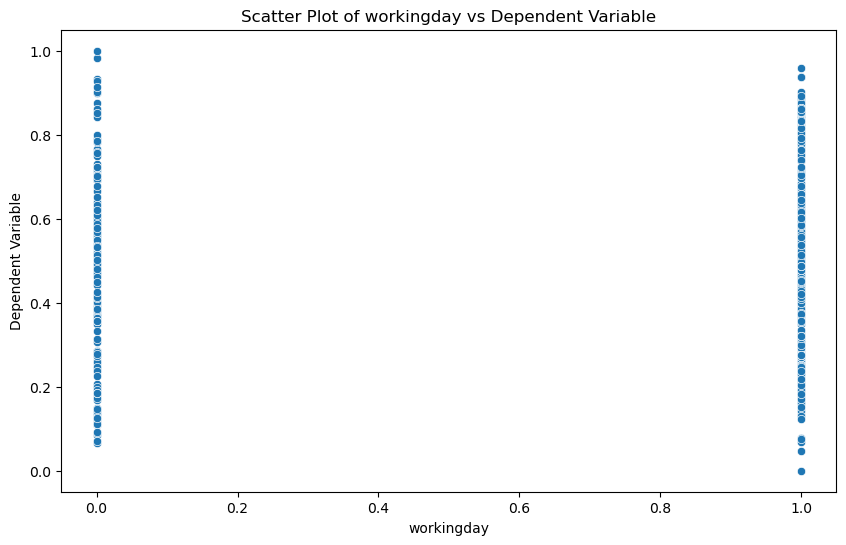

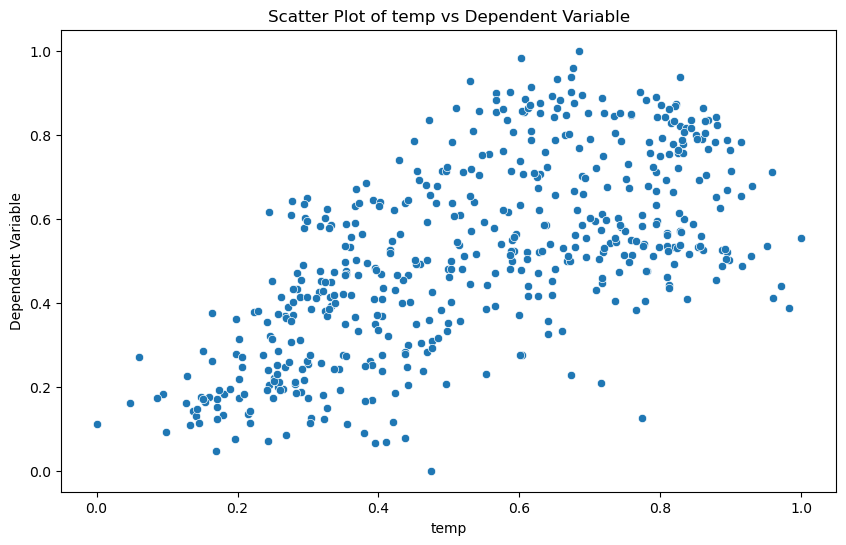

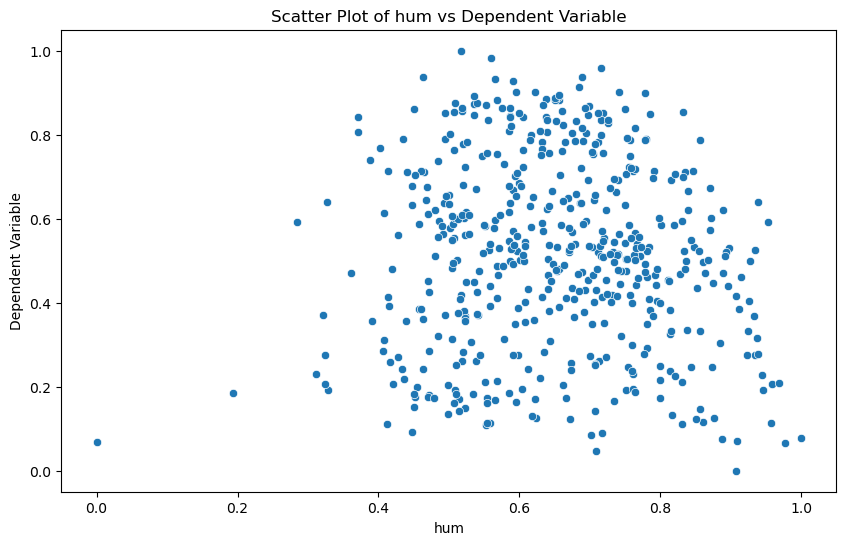

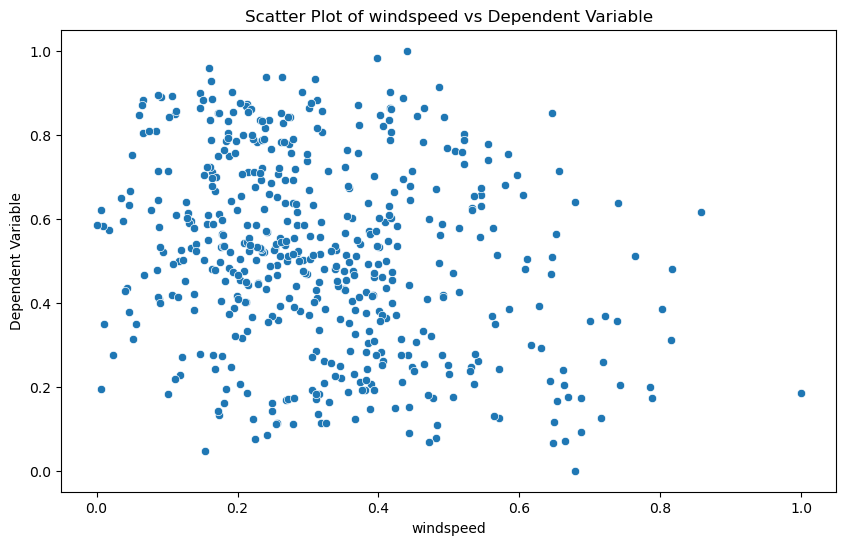

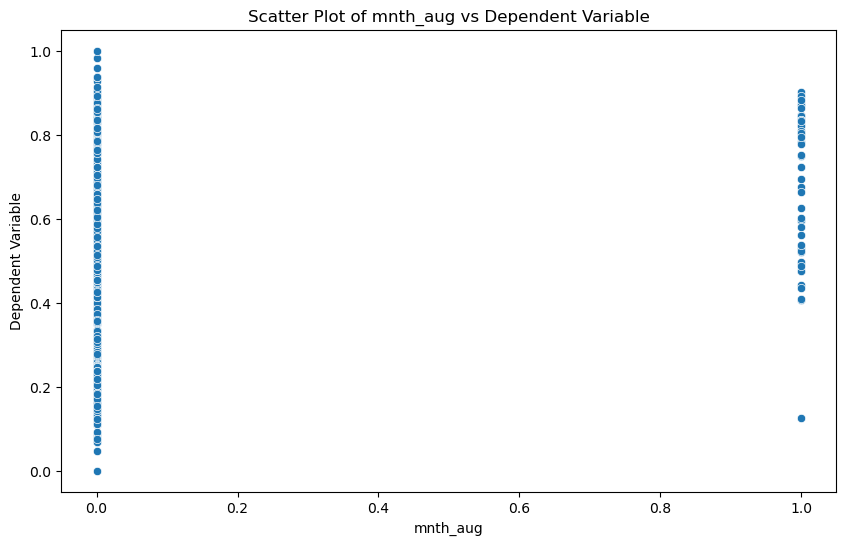

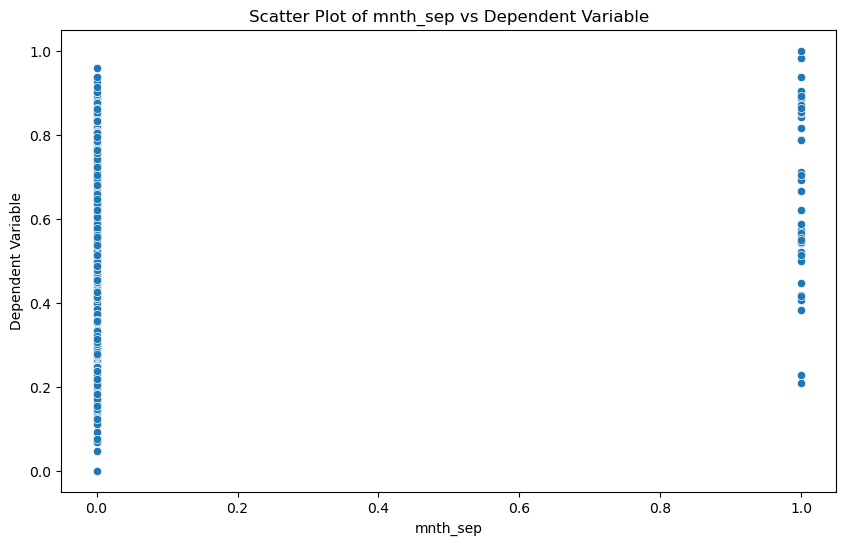

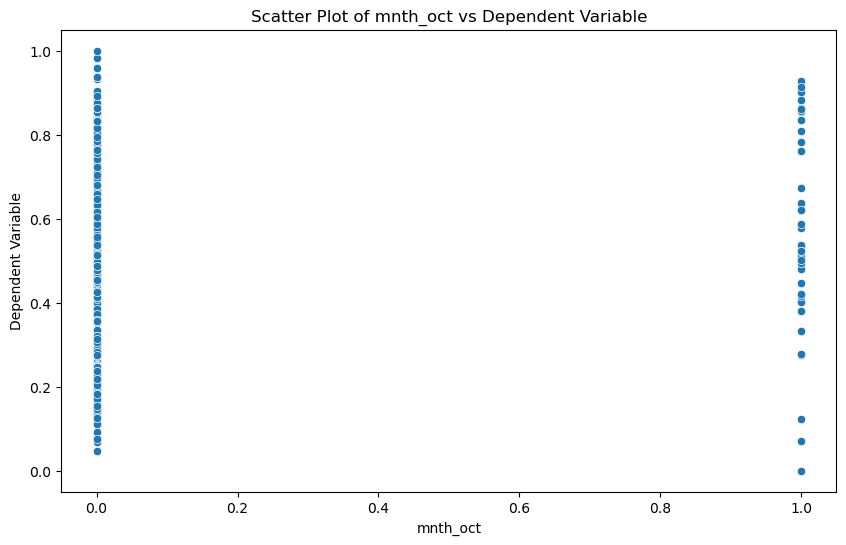

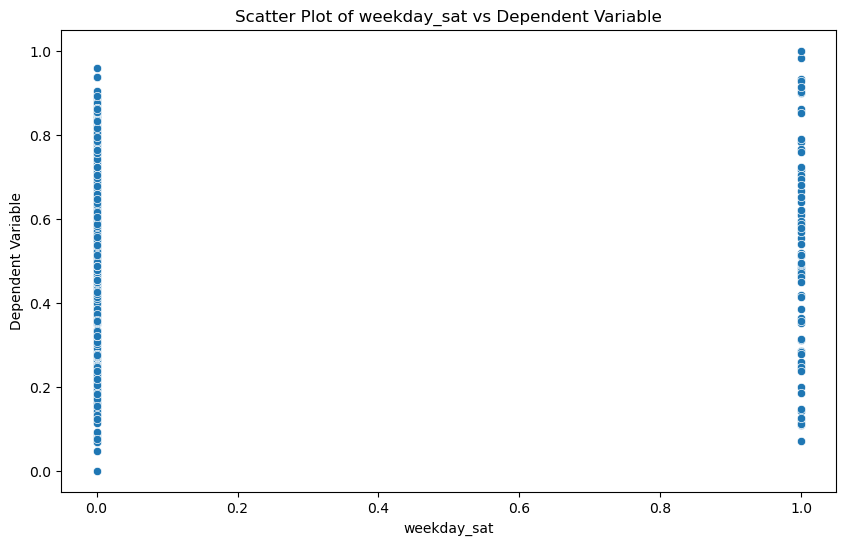

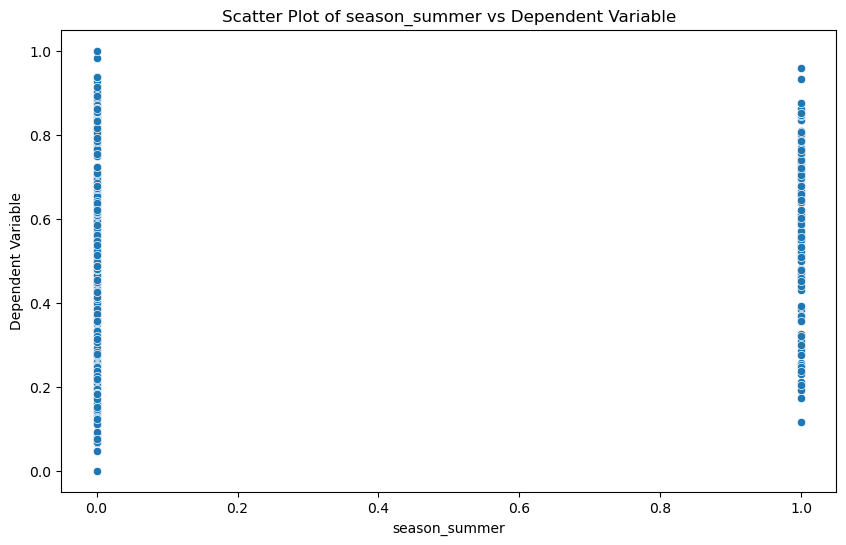

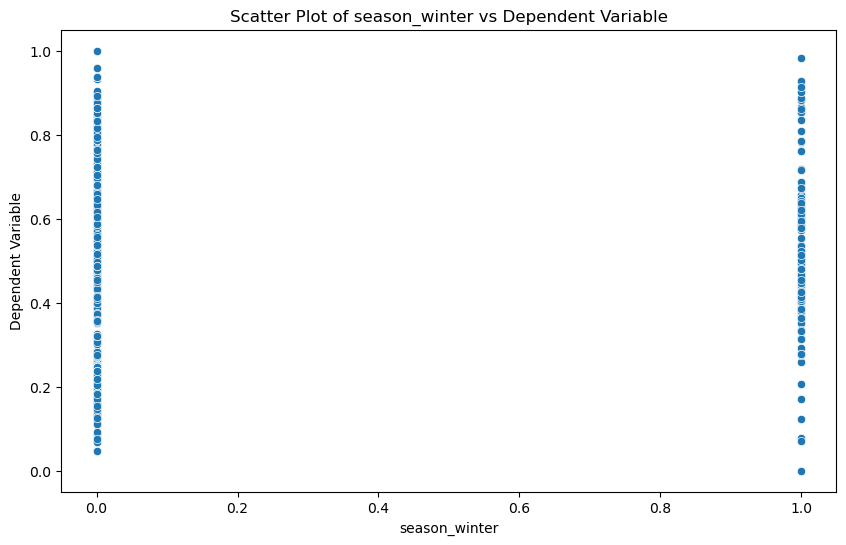

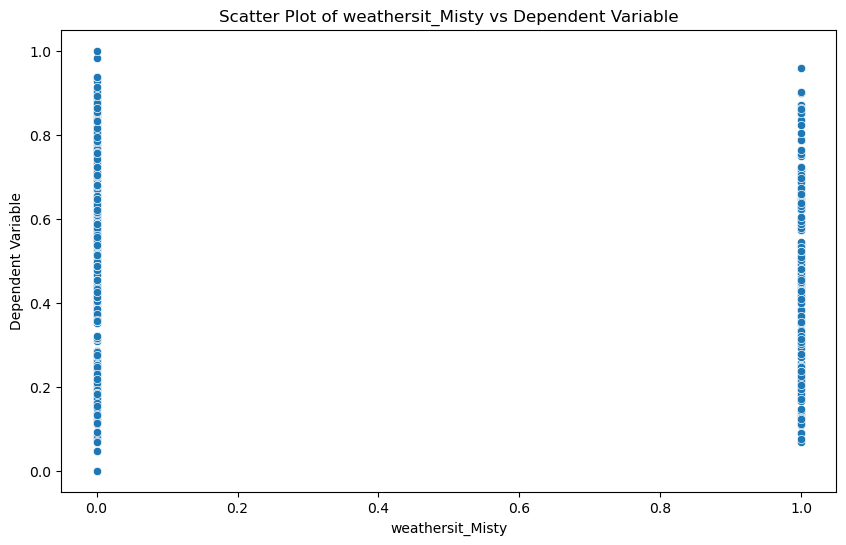

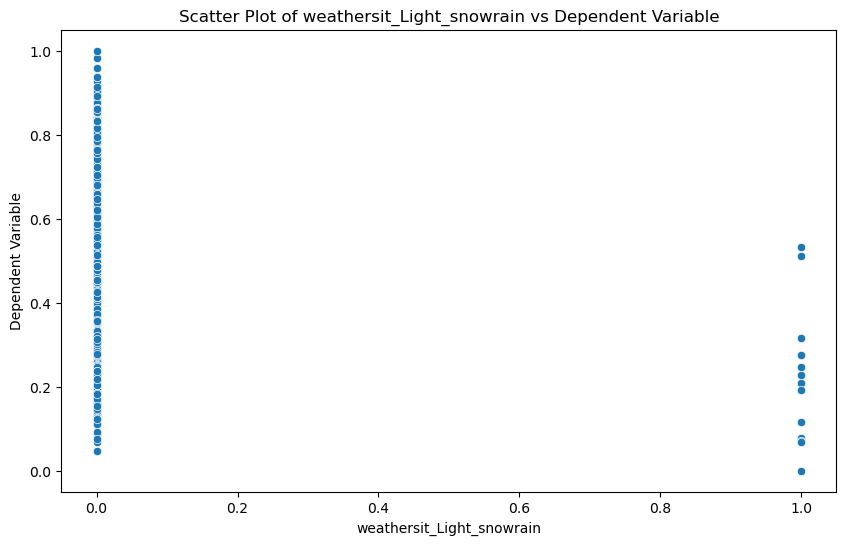

In [77]:
for col in X_train_rfe3.columns[1:]:  # Skip the constant term
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_train_rfe3[col], y=y_train)
    plt.title(f'Scatter Plot of {col} vs Dependent Variable')
    plt.xlabel(col)
    plt.ylabel('Dependent Variable')
    plt.show()

Linearity can be observed from above visualizations.

#### Homoscedasticity

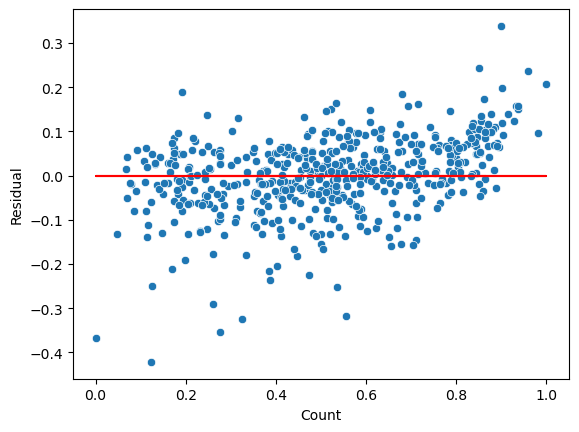

In [78]:
y_train_pred = lm4.predict(X_train_rfe3)
residual = y_train - y_train_pred
sns.scatterplot(x= y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

In [79]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Calculate the Durbin-Watson statistic
dw_statistic = durbin_watson(lm4.resid)

print('Durbin-Watson Statistic:', dw_statistic)

Durbin-Watson Statistic: 2.030008269439887


#### Independence of residuals

Durbin-Watson value of final model is 2.030008269439887, which signifies there is no autocorrelation.

<Figure size 1000x600 with 0 Axes>

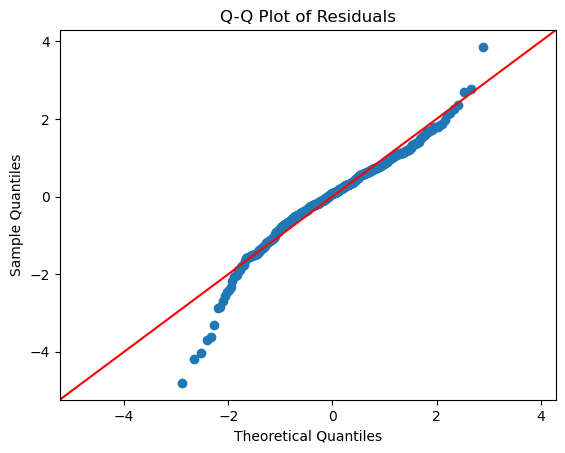

In [80]:
plt.figure(figsize=(10, 6))
sm.qqplot(lm4.resid, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, now make predictions using the final model

In [81]:
X_test_rfe2.describe()

,const,yr,holiday,workingday,temp,hum,windspeed,mnth_aug,mnth_sep,mnth_oct,weekday_sat,season_summer,season_fall,season_winter,weathersit_Misty,weathersit_Light_snowrain
count,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.0,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.059361,0.086758,0.082192,0.118721,0.264840,0.246575,0.232877,0.319635,0.027397
std,0.0,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.236840,0.282125,0.275286,0.324202,0.442259,0.432005,0.423633,0.467403,0.163612
min,1.0,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
X_test_rfe2 = X_test_rfe2.drop(['season_fall'], axis=1)
X_test_rfe2 = X_test_rfe2.drop(['holiday'], axis=1)

In [83]:
X_test_rfe2.shape

(219, 14)

In [84]:
X_train_rfe3.shape

(510, 14)

In [85]:
y_test_pred = lm4.predict(X_test_rfe2)

In [86]:
y_test.shape

(219,)

In [87]:
y_test_pred.shape

(219,)

In [88]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.8137

R-squared score on the test set: 0.8137

## Step: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_test_pred')

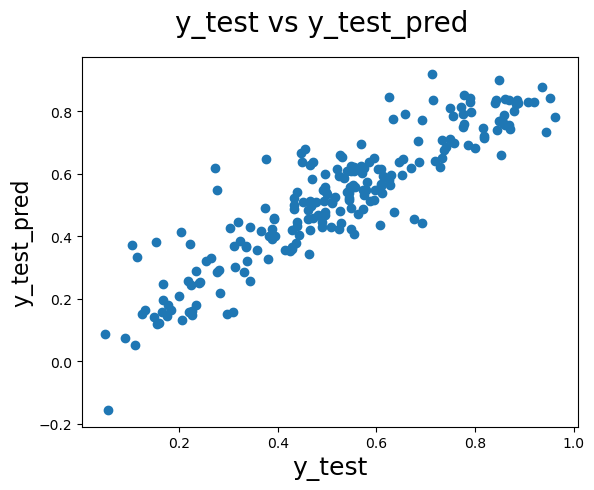

In [89]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

In [90]:
round(lm4.params,4)

const                        0.1848
yr                           0.2293
workingday                   0.0527
temp                         0.5317
hum                         -0.1683
windspeed                   -0.1865
mnth_aug                     0.0564
mnth_sep                     0.1237
mnth_oct                     0.0423
weekday_sat                  0.0613
season_summer                0.1046
season_winter                0.1341
weathersit_Misty            -0.0579
weathersit_Light_snowrain   -0.2478
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.1848 + 0.2293  \times  yr - 0.0527  \times  workingday + 0.5317 \times temp - 0.1683 \times hum - 0.1865 \times windspeed + 0.0564 \times mnth_aug + 0.1237 \times mnth_sep + 0.0423 \times mnth_oct + 0.0613 \times weekday_sat + 0.1046 \times season_summer + 0.1341 \times season_winter - 0.0579 \times wathersit_Misty - 0.2478 \times weathersit_Light_snowrain $

In [91]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7851


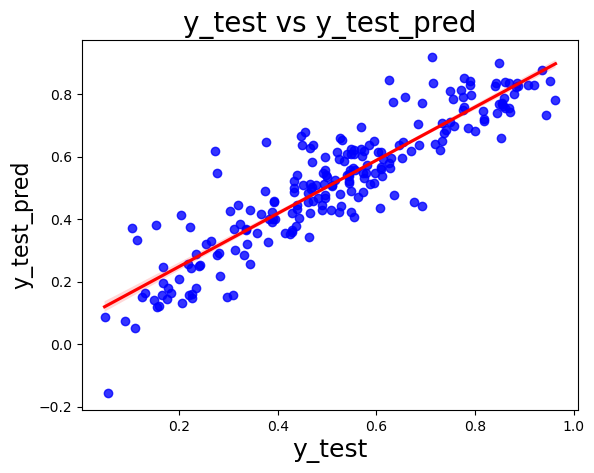

In [92]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.847
    - Test dataset R^2           : 0.8137
    - Train dataset Adjusted R^2 : 0.843    
    - Test dataset Adjusted R^2  : 0.7851

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.

In [93]:
summary_df = pd.DataFrame({
    'Feature': X_train_rfe3.columns,
    'Coefficient': lm4.params,
    'P-Value': lm4.pvalues
})

summary_df

,Feature,Coefficient,P-Value
const,const,0.184780,2.007209e-10
yr,yr,0.229323,2.517121e-107
workingday,workingday,0.052663,1.593066e-06
temp,temp,0.531651,9.828528e-86
hum,hum,-0.168252,7.083803e-06
windspeed,windspeed,-0.186547,7.283578e-13
mnth_aug,mnth_aug,0.056352,5.272303e-04
mnth_sep,mnth_sep,0.123706,9.854483e-14
mnth_oct,mnth_oct,0.042337,1.388574e-02
weekday_sat,weekday_sat,0.061344,1.400969e-05


In [94]:
# Filter significant features
significant_features = summary_df[summary_df['P-Value'] < 0.05]

In [95]:
top_features = significant_features.reindex(significant_features['Coefficient'].abs().sort_values(ascending=False).index)

In [96]:
top_features

,Feature,Coefficient,P-Value
temp,temp,0.531651,9.828528e-86
weathersit_Light_snowrain,weathersit_Light_snowrain,-0.247816,9.073782e-20
yr,yr,0.229323,2.517121e-107
windspeed,windspeed,-0.186547,7.283578e-13
const,const,0.184780,2.007209e-10
hum,hum,-0.168252,7.083803e-06
season_winter,season_winter,0.134082,3.392743e-26
mnth_sep,mnth_sep,0.123706,9.854483e-14
season_summer,season_summer,0.104649,1.474729e-20
weekday_sat,weekday_sat,0.061344,1.400969e-05
